# Final Project

**Import Libraries**

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from feature_selector import FeatureSelector
import warnings
warnings.filterwarnings('ignore')

Feature selector is a tool for dimensionality reduction of machine learning datasets.
https://github.com/WillKoehrsen/feature-selector


## 1. Data exploration

In [131]:
df_train = pd.read_csv("train.csv")

## `columns`

In [132]:
df_train.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', 'label'],
      dtype='object')

The columns don't give us any valuable info

## `dtypes`

In [133]:
df_train.dtypes

0         object
1        float64
2         object
3         object
4        float64
5         object
6         object
7        float64
8         object
9        float64
10       float64
11       float64
12       float64
13       float64
14       float64
15       float64
16       float64
17       float64
18       float64
19       float64
20       float64
label      int64
dtype: object

columns 0,2,35,6,8 are categorial variables, the rest are of type float and the labels are booleans

**To understand the data we'll look at each variable and try to understand their meaning and relevance to our problem**

## First we'll analyze 'label'

In [134]:
df_train['label'].describe()

count    24420.000000
mean         0.241482
std          0.427991
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: label, dtype: float64

We can see that the mean is closer to 0 than 1. This means there are more samples labeled 0.

Lets visualize that

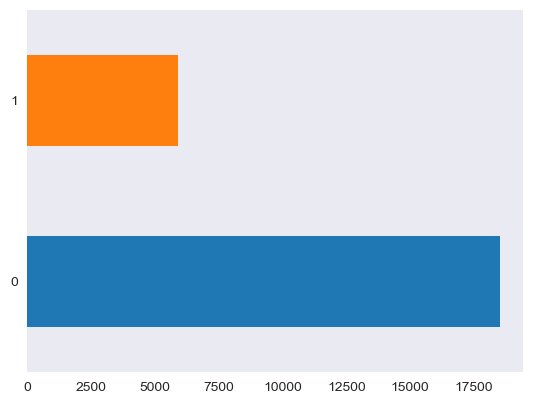

In [135]:
df_train['label'].value_counts().plot.barh()
plt.show()

Indeed many more 0's than 1's

## Numerical and Boolean variables

**Feature '1'**

In [136]:
df_train['1'].describe()

count    24331.000000
mean         8.847096
std          2.192678
min          0.000000
25%          8.000000
50%          9.000000
75%         10.000000
max         13.000000
Name: 1, dtype: float64

In [137]:
df_train['1'].isnull().sum()/df_train['1'].count()

0.003657885002671489

Less than 0.3% missing values. for the sake of the exploration we'll drop the missing values

**Distribution**

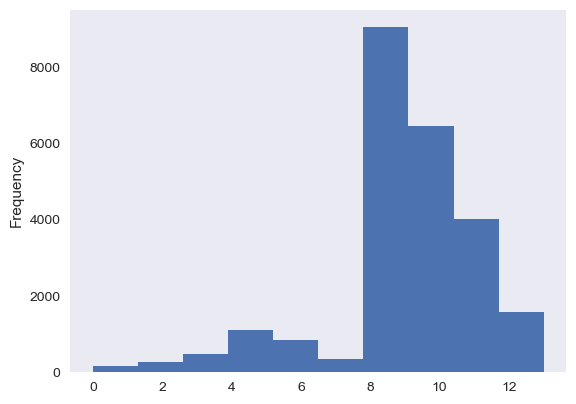

In [138]:
df_train['1'].dropna().plot.hist()
plt.show()

Feature 1 doesn't look like any familiar distribution

**Let's see how it correlates with our labels**

To do that we'll precalculate the labels rate (probability) and plot a bar plot

This is done by segmenting df_train['1'] values into bins using pd.cut and using groupby on the bins to calculate the mean of the corresponding labels

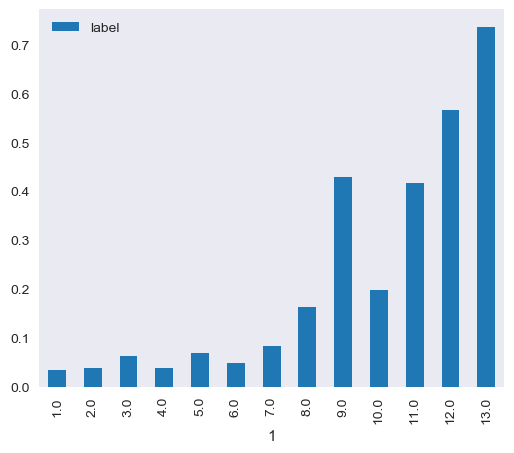

In [139]:
min, max = df_train['1'].min(), df_train['1'].max()
bins = np.linspace(min, max, (max-min+1))
labels = bins[1:]

rpt = (df_train.groupby(pd.cut(df_train['1'], bins, labels=labels)).label.mean()).dropna().to_frame('label')
rpt.plot.bar(figsize=(6, 5))

Now we can see that the higher the value of the feature df_train['1'] the more likley it is to be labeled as '1'. **This feature is in some kind of correlation with the labels**

**Feature '4'**

In [140]:
df_train['4'].describe()

count    24375.000000
mean         0.454113
std          0.497900
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: 4, dtype: float64

In [141]:
df_train['4'].isnull().sum()/df_train['4'].count()

0.0018461538461538461

Less than 0.2% missing values

**Distribution**

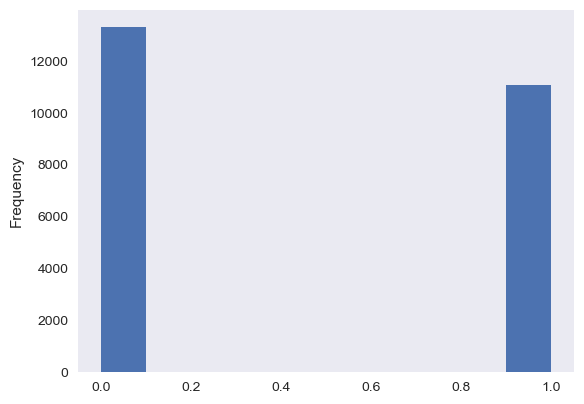

In [142]:
df_train['4'].dropna().plot.hist()
plt.show()

We can see that feature has a bit more 0's than 1's

**Let's see how it correlates with our labels**

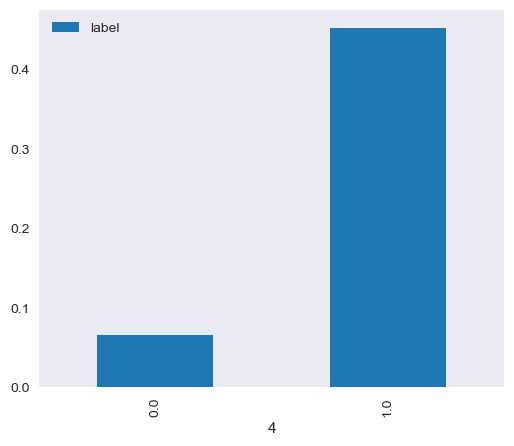

In [143]:
rpt = (df_train.groupby(df_train['4']).label.mean()).dropna().to_frame('label')
rpt.plot.bar(figsize=(6, 5))

For the feature indexed '4', 0's are very likley to be labeld 0 and 1's have a mean close to 0.5 which means there is a similar amount of 0 and 1 labels

**Feature '7'**

In [144]:
df_train['7'].describe()

count    24338.000000
mean         0.670022
std          0.470214
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: 7, dtype: float64

In [145]:
df_train['7'].isnull().sum()/df_train['7'].count()

0.0033692168625195167

Less than 0.4% missing values

**Distribution**

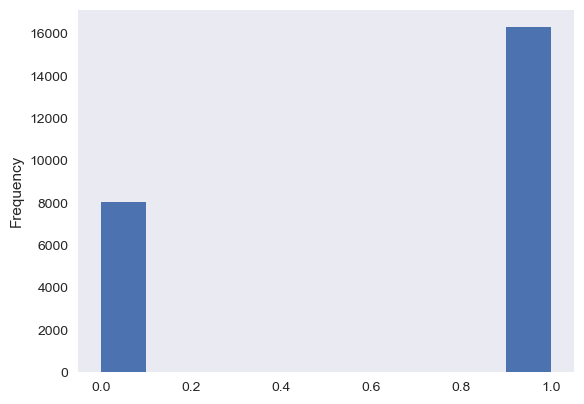

In [146]:
df_train['7'].dropna().plot.hist()
plt.show()

Boolean variable with more 1's than 0's

**Let's see how it correlates with our labels**

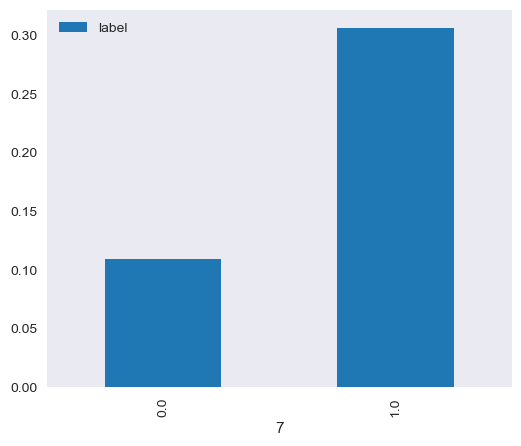

In [147]:
rpt = (df_train.groupby(df_train['7']).label.mean()).dropna().to_frame('label')
rpt.plot.bar(figsize=(6, 5))

For the feature indexed '7', 0's are very likley to be labeld 0 and 1's have a mean close to 0.3 which means it is also more likley to be labeld 0

**Feature '9'**

In [148]:
df_train['9'].describe()

count    24371.000000
mean         3.671814
std          1.007753
min          1.960714
25%          2.901297
50%          3.594658
75%          4.323616
max          7.235182
Name: 9, dtype: float64

We can see that feature 9 is a numerical variable with mean=3.67

In [149]:
df_train['9'].isnull().sum()/df_train['9'].count()

0.0020105863526322268

Around than 0.2% missing values

**Distribution**

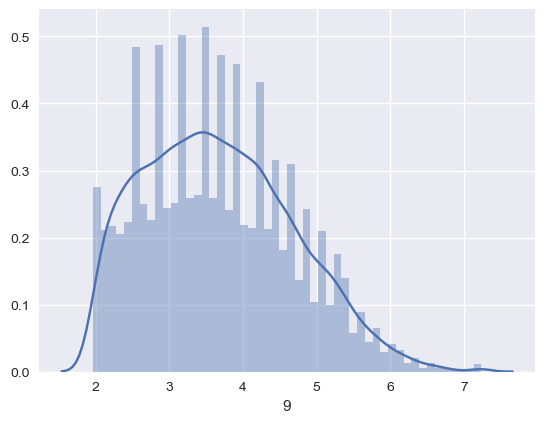

In [150]:
sns.distplot(df_train['9'].dropna());

Looks like a gamma or a normal distribution

**Let's see how it correlates with our labels**

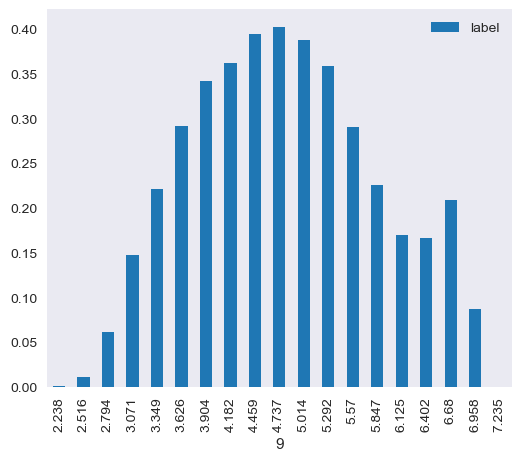

In [151]:
min, max = df_train['9'].min(), df_train['9'].max()
bins = np.linspace(min, max, 20)

# "%.3f" percision
bins = list(np.around(np.array(bins),3))
labels = bins[1:]

rpt = (df_train.groupby(pd.cut(df_train['9'], bins, labels=labels)).label.mean()).dropna().to_frame('label')
rpt.plot.bar(figsize=(6, 5))

All of the samples from this feature have a mean smaller than 0.4 which means they are more likley to be labled 0

Samples around the value 4.7 have a higher probability of being labeled 1

**Feature '10'**

In [152]:
df_train['10'].describe()

count    24370.000000
mean        26.197359
std         20.040483
min        -50.339925
25%         12.718312
50%         26.192663
75%         39.765982
max        109.813493
Name: 10, dtype: float64

In [153]:
df_train['10'].isnull().sum()/df_train['10'].count()

0.002051702913418137

Around than 0.2% missing values

**Distribution**

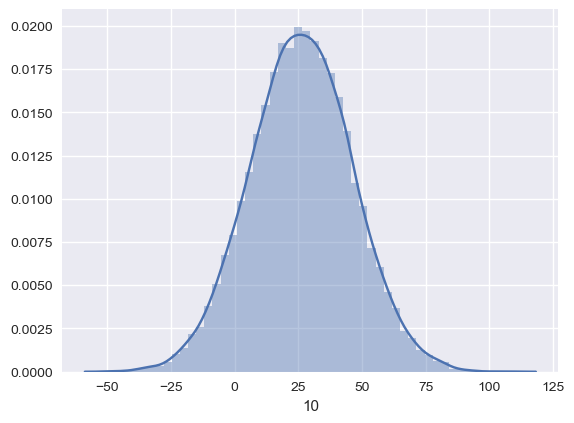

In [154]:
sns.distplot(df_train['10'].dropna());

Looks like a gaussian distribution (mean=26.197, std=20.04)

**Let's see how it correlates with our labels**

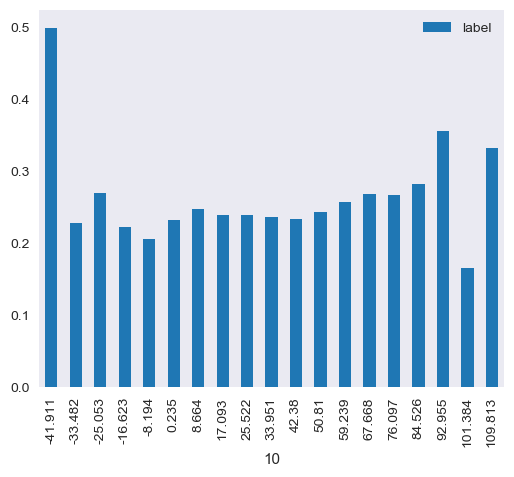

In [155]:
min, max = df_train['10'].min(), df_train['10'].max()
bins = np.linspace(min, max, 20)

# "%.3f" percision
bins = list(np.around(np.array(bins),3))
labels = bins[1:]

rpt = (df_train.groupby(pd.cut(df_train['10'], bins, labels=labels)).label.mean()).dropna().to_frame('label')
rpt.plot.bar(figsize=(6, 5))

This distribution looks uniform, most samples have a similar probability of being labeled 0

The mean of most samples is somewere around 0.2-0.3 which means there is a higher probability of being labeled 0

**Feature '11'**

In [156]:
df_train['11'].describe()

count    24385.000000
mean         6.370249
std          1.231992
min          2.979403
25%          5.478522
50%          6.333094
75%          7.205337
max         16.289653
Name: 11, dtype: float64

In [157]:
df_train['11'].isnull().sum()/df_train['11'].count()

0.0014353085913471396

Around than 0.14% missing values

**Distribution**

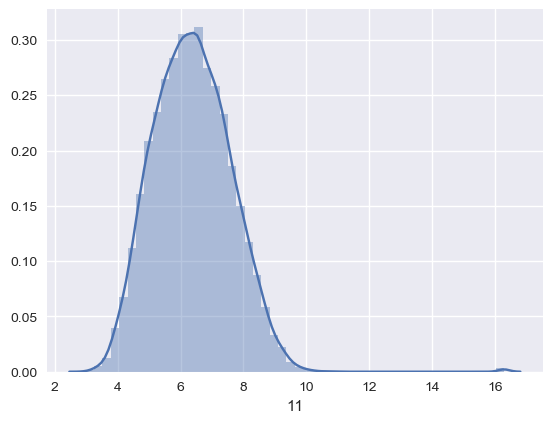

In [158]:
sns.distplot(df_train['11'].dropna());

Looks like a gaussian distribution (mean=6.37, std=1.23)

**Let's see how it correlates with our labels**

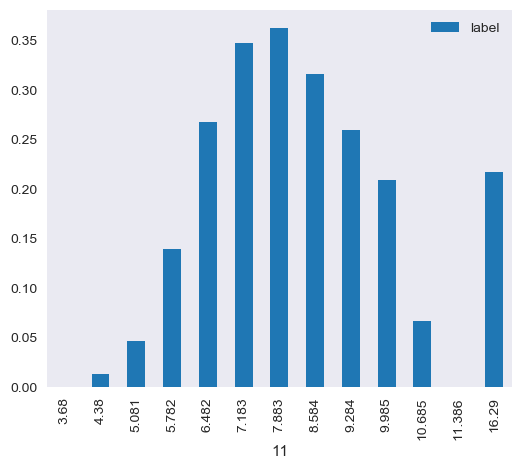

In [159]:
min, max = df_train['11'].min(), df_train['11'].max()
bins = np.linspace(min, max, 20)

# "%.3f" percision
bins = list(np.around(np.array(bins),3))
labels = bins[1:]

rpt = (df_train.groupby(pd.cut(df_train['11'], bins, labels=labels)).label.mean()).dropna().to_frame('label')
rpt.plot.bar(figsize=(6, 5))

All of the samples from this feature have a mean smaller than 0.4 which means they are more likley to be labled 0

Samples around the value 7.9 have a higher probability of being labeled 1

**Feature '12'**

In [160]:
df_train['12'].describe()

count    24348.000000
mean      1265.287621
std        699.914078
min         81.900000
25%        785.623333
50%       1191.066667
75%       1584.018333
max       9702.900000
Name: 12, dtype: float64

In [161]:
df_train['12'].isnull().sum()/df_train['12'].count()

0.002957121734844751

Around than 0.3% missing values

**Distribution**

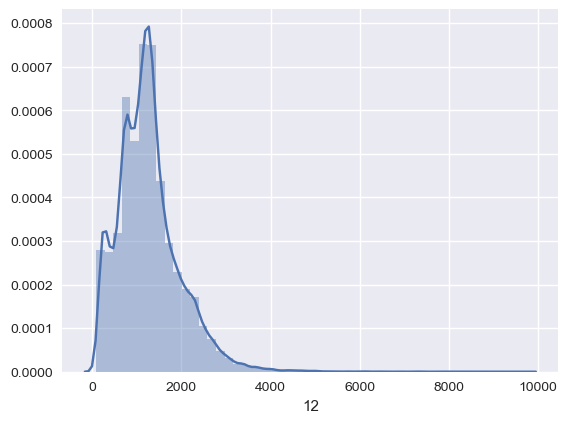

In [162]:
sns.distplot(df_train['12'].dropna());

Looks like a gamma or a normal distribution

**Let's see how it correlates with our labels**

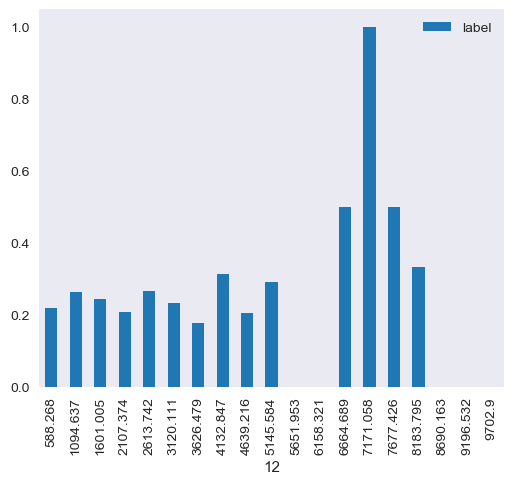

In [163]:
min, max = df_train['12'].min(), df_train['12'].max()
bins = np.linspace(min, max, 20)

# "%.3f" percision
bins = list(np.around(np.array(bins),3))
labels = bins[1:]

rpt = (df_train.groupby(pd.cut(df_train['12'], bins, labels=labels)).label.mean()).dropna().to_frame('label')
rpt.plot.bar(figsize=(6, 5))

Hard to determine the correlation

**Feature '13'**

In [164]:
df_train['13'].describe()

count    24326.000000
mean       100.988525
std         26.709383
min         10.000000
25%         90.000000
50%        100.000000
75%        120.000000
max        322.906667
Name: 13, dtype: float64

In [165]:
df_train['13'].isnull().sum()/df_train['13'].count()

0.0038641782454986433

Around than 0.4% missing values

**Distribution**

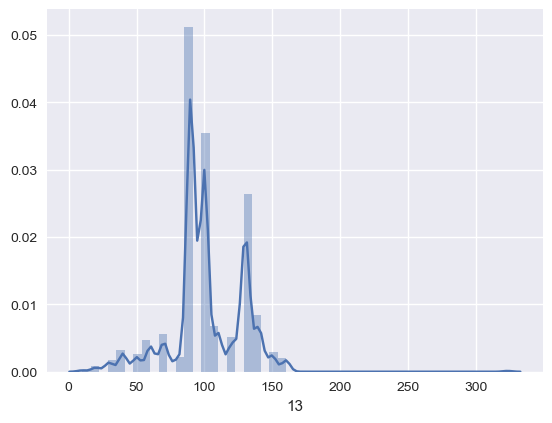

In [166]:
sns.distplot(df_train['13'].dropna());

**Let's see how it correlates with our labels**

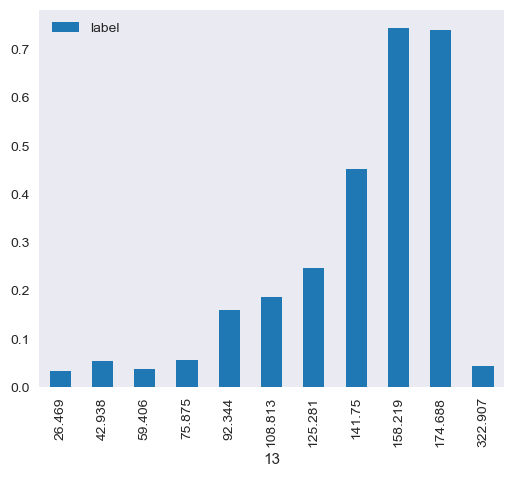

In [167]:
min, max = df_train['13'].min(), df_train['13'].max()
bins = np.linspace(min, max, 20)

# "%.3f" percision
bins = list(np.around(np.array(bins),3))
labels = bins[1:]

rpt = (df_train.groupby(pd.cut(df_train['13'], bins, labels=labels)).label.mean()).dropna().to_frame('label')
rpt.plot.bar(figsize=(6, 5))

We can see that up until the value of around 322 the probability of a sample from feature 13 of being labeled 1 is growing as the value of the feature grows. **This feature is correlated with the labels**

**Feature '14'**

In [168]:
df_train['14'].describe()

count    24344.000000
mean       227.826768
std         31.799264
min         -2.099010
25%        220.378101
50%        230.440481
75%        251.341828
max        281.130118
Name: 14, dtype: float64

In [169]:
df_train['14'].isnull().sum()/df_train['14'].count()

0.0031219191587249424

Around than 0.3% missing values

**Distribution**

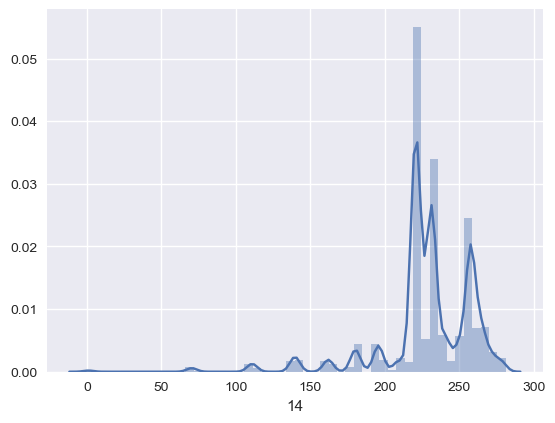

In [170]:
sns.distplot(df_train['14'].dropna());

Looks like two gaussians

**Let's see how it correlates with our labels**

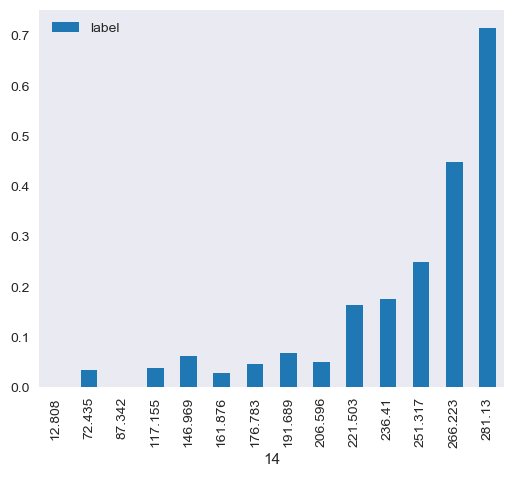

In [171]:
min, max = df_train['14'].min(), df_train['14'].max()
bins = np.linspace(min, max, 20)

# "%.3f" percision
bins = list(np.around(np.array(bins),3))
labels = bins[1:]

rpt = (df_train.groupby(pd.cut(df_train['14'], bins, labels=labels)).label.mean()).dropna().to_frame('label')
rpt.plot.bar(figsize=(6, 5))

The probability of a samle from feature 14 of being labeled 1 is growing as the value of the feature grows. **This feature is correlated with the labels**

**Feature '15'**

In [172]:
df_train['15'].describe()

count    24383.000000
mean         2.702128
std          1.260845
min         -2.421165
25%          1.881987
50%          2.690966
75%          3.527378
max         12.999779
Name: 15, dtype: float64

In [173]:
df_train['15'].isnull().sum()/df_train['15'].count()

0.0015174506828528073

Around than 0.15% missing values

**Distribution**

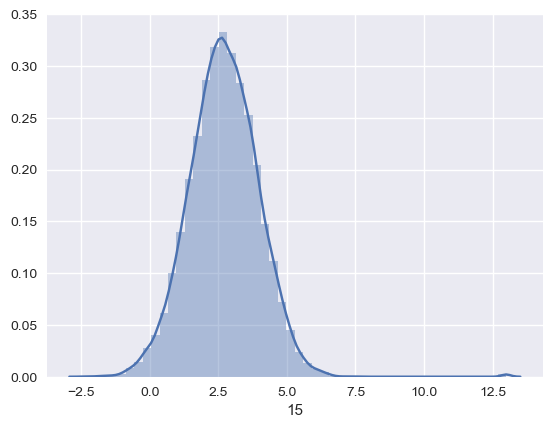

In [174]:
sns.distplot(df_train['15'].dropna());

Looks like a gaussian distribution (mean=2.7, std=1.26)

**Let's see how it correlates with our labels**

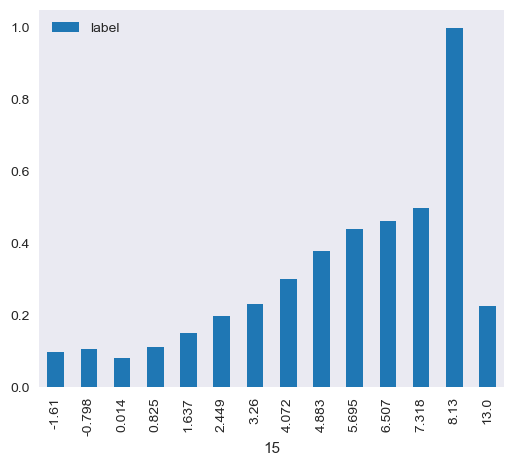

In [175]:
min, max = df_train['15'].min(), df_train['15'].max()
bins = np.linspace(min, max, 20)

# "%.3f" percision
bins = list(np.around(np.array(bins),3))
labels = bins[1:]

rpt = (df_train.groupby(pd.cut(df_train['15'], bins, labels=labels)).label.mean()).dropna().to_frame('label')
rpt.plot.bar(figsize=(6, 5))

We can see that up until the value of around 13 the probability of a sample from feature 15 of being labeled 1 is growing as the value of the feature grows. **This feature is in some kind of correlation with the labels**

**Feature '16'**

In [176]:
df_train['16'].describe()

count    24414.000000
mean       248.587052
std        165.768605
min          0.001017
25%        112.874858
50%        227.420680
75%        356.658193
max       1009.450163
Name: 16, dtype: float64

In [177]:
df_train['16'].isnull().sum()/df_train['16'].count()

0.0002457606291472106

Less than 0.01% missing values

**Distribution**

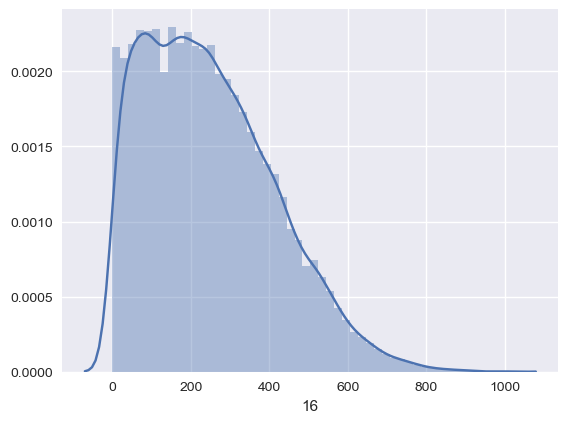

In [178]:
sns.distplot(df_train['16'].dropna());

Looks like a gamma or a normal distribution

**Let's see how it correlates with our labels**

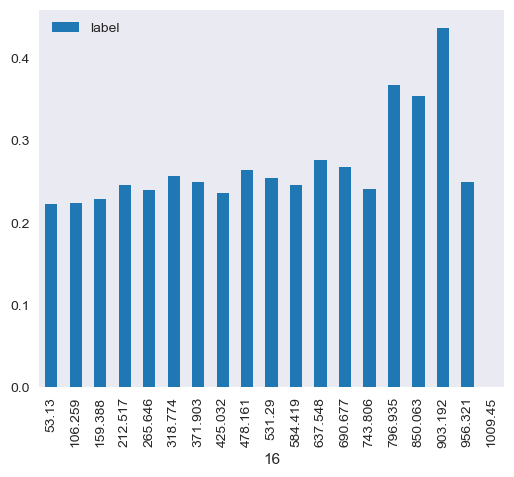

In [179]:
min, max = df_train['16'].min(), df_train['16'].max()
bins = np.linspace(min, max, 20)

# "%.3f" percision
bins = list(np.around(np.array(bins),3))
labels = bins[1:]

rpt = (df_train.groupby(pd.cut(df_train['16'], bins, labels=labels)).label.mean()).dropna().to_frame('label')
rpt.plot.bar(figsize=(6, 5))

This looks fairly uniform. Similar probability of being labeld 0 for all values. The mean of most values is less than 0.3

**Feature '17'**

In [180]:
df_train['17'].describe()

count    24399.000000
mean         7.859953
std         53.396269
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        714.000000
Name: 17, dtype: float64

In [181]:
df_train['17'].isnull().sum()/df_train['17'].count()

0.0008606910119267183

Less than 0.01% missing values

**Distribution**

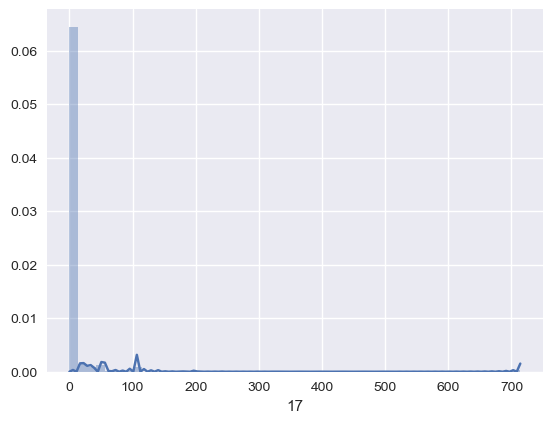

In [182]:
sns.distplot(df_train['17'].dropna());

We can see that almost all of the samples from this feature are 0's

**Let's see how it correlates with our labels**

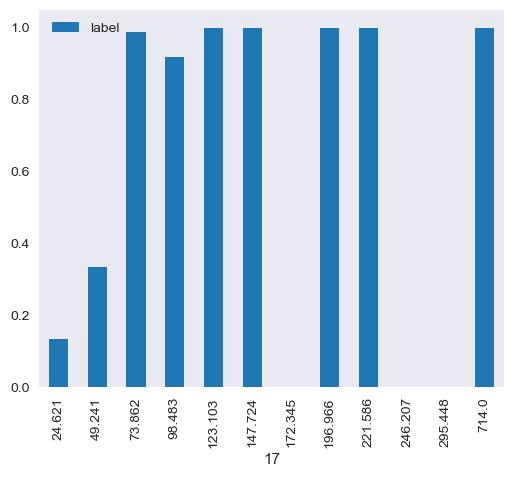

In [183]:
min, max = df_train['17'].min(), df_train['17'].max()
bins = np.linspace(min, max, 30)

# "%.3f" percision
bins = list(np.around(np.array(bins),3))
labels = bins[1:]

rpt = (df_train.groupby(pd.cut(df_train['17'], bins, labels=labels)).label.mean()).dropna().to_frame('label')
rpt.plot.bar(figsize=(6, 5))

**We can see a correlation between this feature and the labels**. Almost all the labels with a values higher than 73 are labeld 1 while the rest are more likely to be labeld 0

**Feature '18'**

In [184]:
df_train['18'].describe()

count    24349.000000
mean         0.627336
std          2.882526
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         31.000000
Name: 18, dtype: float64

In [185]:
df_train['18'].isnull().sum()/df_train['18'].count()

0.0029159308390488315

Less than 0.3% missing values

**Distribution**

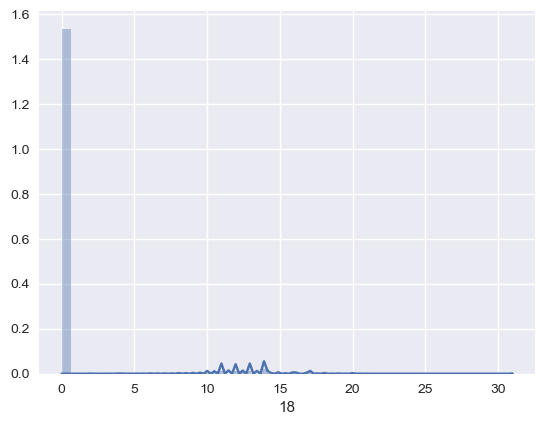

In [186]:
sns.distplot(df_train['18'].dropna());

We can see that almost all of the samples from this feature are 0's

**Let's see how it correlates with our labels**

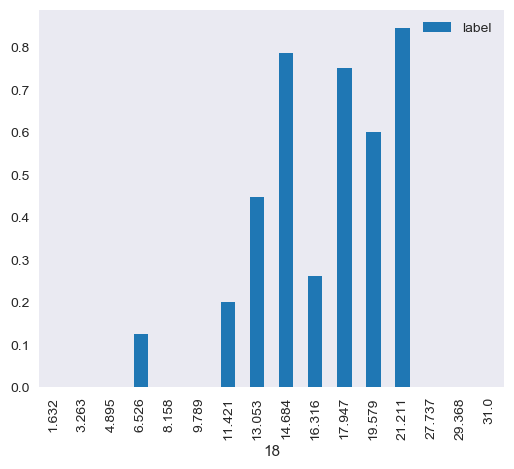

In [187]:
min, max = df_train['18'].min(), df_train['18'].max()
bins = np.linspace(min, max, 20)

# "%.3f" percision
bins = list(np.around(np.array(bins),3))
labels = bins[1:]

rpt = (df_train.groupby(pd.cut(df_train['18'], bins, labels=labels)).label.mean()).dropna().to_frame('label')
rpt.plot.bar(figsize=(6, 5))

No visible correlation

**Feature '19'**

In [188]:
df_train['19'].describe()

count    24316.000000
mean        81.088419
std         24.746109
min          2.000000
25%         80.000000
50%         80.000000
75%         90.000000
max        198.000000
Name: 19, dtype: float64

In [189]:
df_train['19'].isnull().sum()/df_train['19'].count()

0.00427701924658661

Around 0.4% missing values

**Distribution**

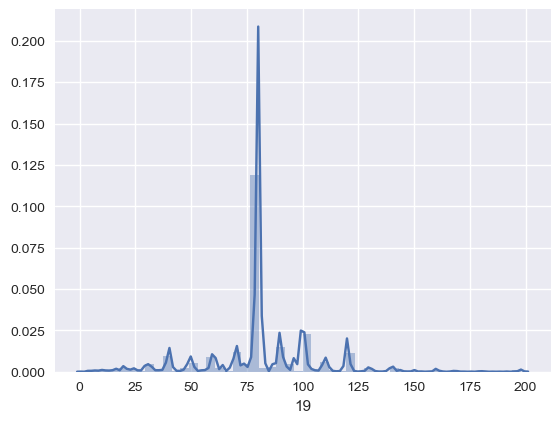

In [190]:
sns.distplot(df_train['19'].dropna());

**Let's see how it correlates with our labels**

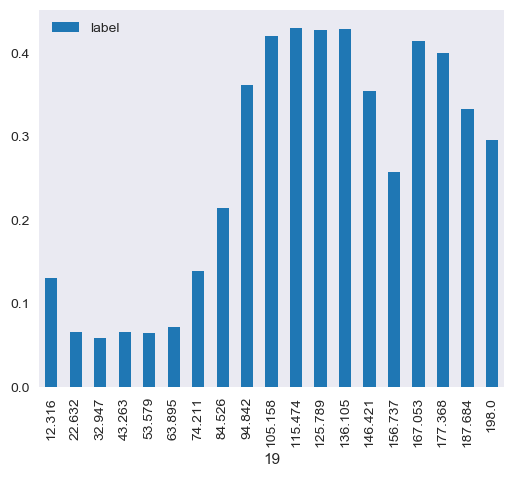

In [191]:
min, max = df_train['19'].min(), df_train['19'].max()
bins = np.linspace(min, max, 20)

# "%.3f" percision
bins = list(np.around(np.array(bins),3))
labels = bins[1:]

rpt = (df_train.groupby(pd.cut(df_train['19'], bins, labels=labels)).label.mean()).dropna().to_frame('label')
rpt.plot.bar(figsize=(6, 5))

No visible correlation

**Feature '20'**

In [192]:
df_train['20'].describe()

count    24322.000000
mean         4.070039
std          1.687357
min         -3.000000
25%          3.000000
50%          4.000000
75%          5.000000
max         18.303329
Name: 20, dtype: float64

In [193]:
df_train['20'].isnull().sum()/df_train['20'].count()

0.004029273908395691

Around 0.4% missing values

**Distribution**

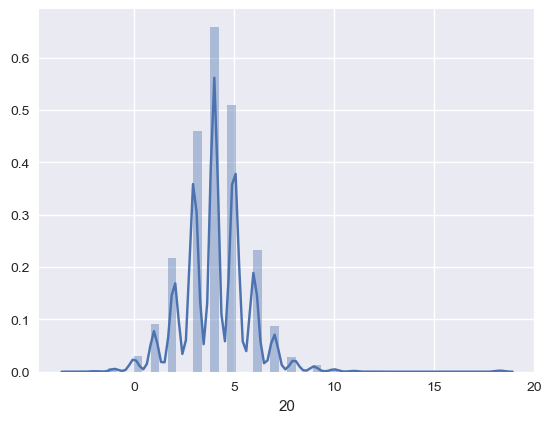

In [194]:
sns.distplot(df_train['20'].dropna());

Looks like a gaussian distribution (mean=4.07, std=1.68)

**Let's see how it correlates with our labels**

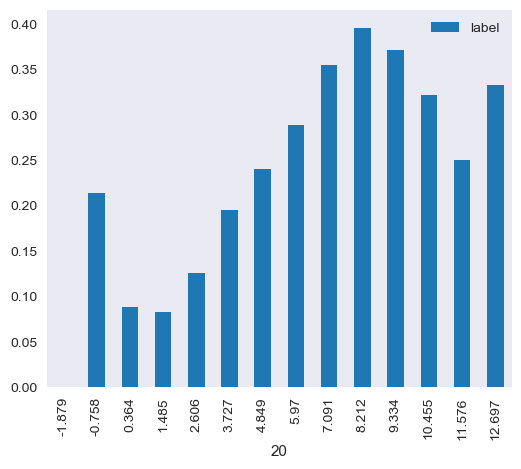

In [195]:
min, max = df_train['20'].min(), df_train['20'].max()
bins = np.linspace(min, max, 20)

# "%.3f" percision
bins = list(np.around(np.array(bins),3))
labels = bins[1:]

rpt = (df_train.groupby(pd.cut(df_train['20'], bins, labels=labels)).label.mean()).dropna().to_frame('label')
rpt.plot.bar(figsize=(6, 5))

## Categorial variables

**Feature '0'**

In [196]:
df_train['0'].describe()

count     23007
unique        7
top           A
freq      16974
Name: 0, dtype: object

**Frequency of each category**

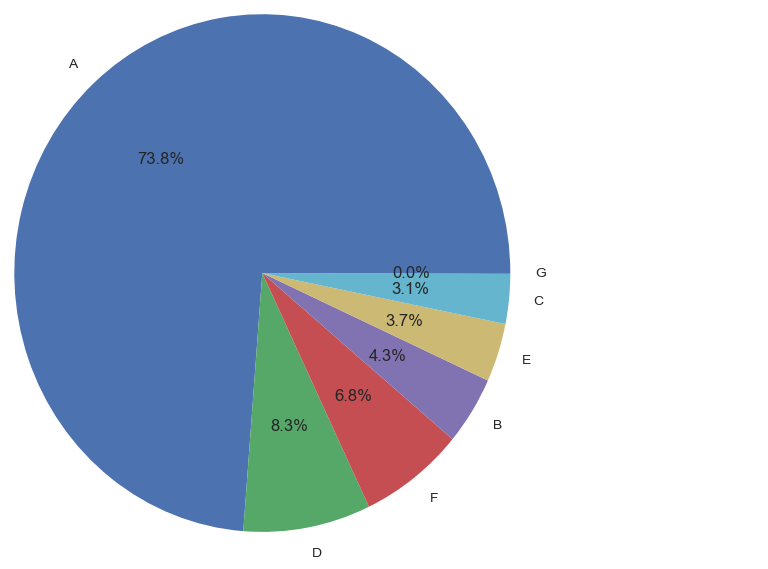

In [197]:
labels = df_train['0'].value_counts().index.tolist()
counts = df_train['0'].value_counts().values.tolist()
fig1, ax1 = plt.subplots()
ax1.pie(counts, labels=labels, autopct='%1.1f%%')
ax1.axis([0, 2, -1, 0.4])
plt.show()

Most of the samples from feature 0 are of category A

**Let's see how it correlates with our labels**

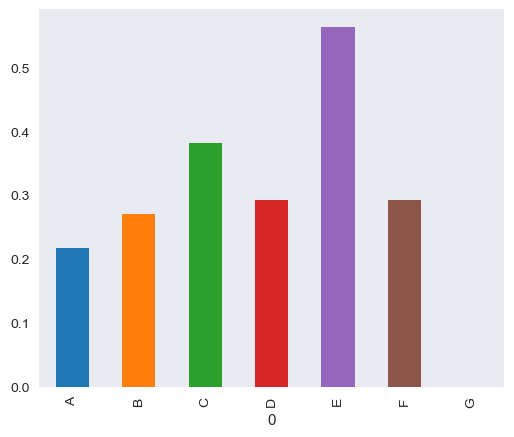

In [198]:
rpt = (df_train.groupby(df_train['0']).label.mean()).dropna()
rpt.plot.bar(figsize=(6, 5))

Most of the categories have a low mean. This makes sense as e saw earlier that most of the labels in our dataset are 0's. The category E have a mean above 0.5

**Feature '2'**

In [199]:
df_train['2'].describe()

count     24419
unique        7
top           E
freq      11246
Name: 2, dtype: object

**Frequency of each category**

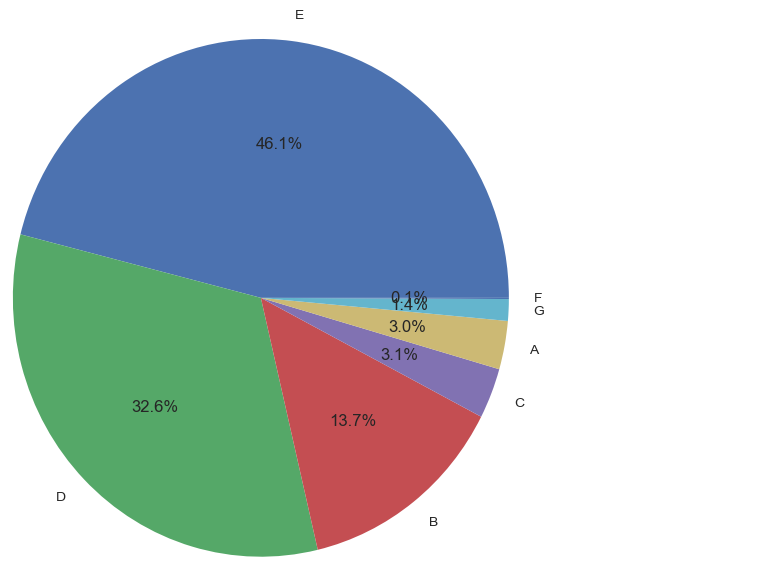

In [200]:
labels = df_train['2'].value_counts().index.tolist()
counts = df_train['2'].value_counts().values.tolist()
fig1, ax1 = plt.subplots()
ax1.pie(counts, labels=labels, autopct='%1.1f%%')
ax1.axis([0, 2, -1, 0.4])
plt.show()

We can see a that most of the categories are E, D or B

**Let's see how it correlates with our labels**

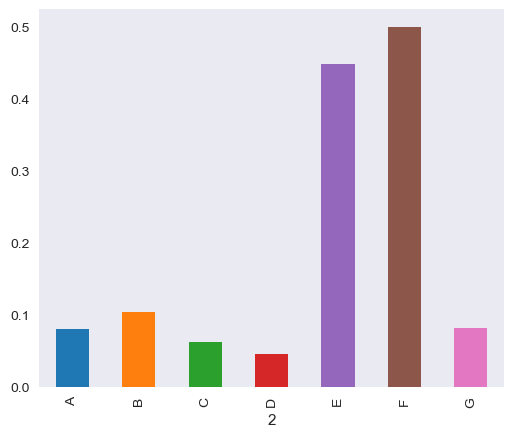

In [201]:
rpt = (df_train.groupby(df_train['2']).label.mean()).dropna()
rpt.plot.bar(figsize=(6, 5))

Low mean for A, B, C, D and G. Mean close to 0.5 of E and F

**Feature '3'**

In [202]:
df_train['3'].describe()

count     24381
unique       15
top           T
freq       3117
Name: 3, dtype: object

**Frequency of each category**

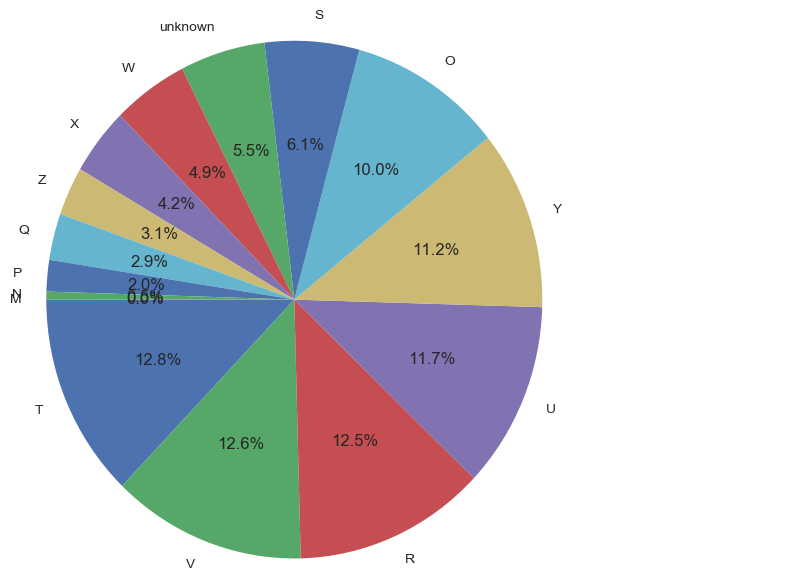

In [203]:
labels = df_train['3'].value_counts().index.tolist()
counts = df_train['3'].value_counts().values.tolist()
fig1, ax1 = plt.subplots()
ax1.pie(counts, labels=labels, autopct='%1.1f%%', startangle=180)
ax1.axis([0, 2, -1, 0.4])
plt.show()

Many categories. 5.5% are labels unknown, we shall handle that later

**Let's see how it correlates with our labels**

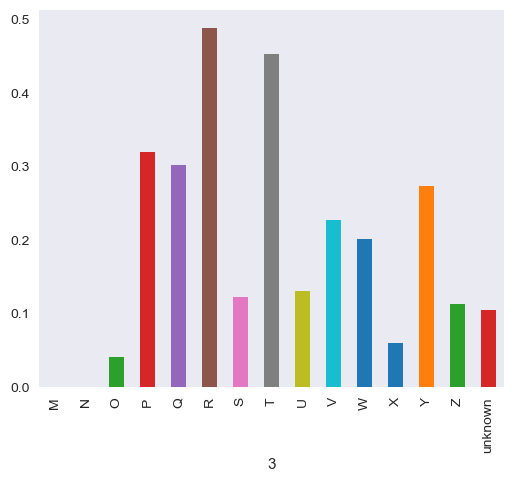

In [204]:
rpt = (df_train.groupby(df_train['3']).label.mean()).dropna()
rpt.plot.bar(figsize=(6, 5))

R and T have a mean close to 0.5 while all the rest have a low mean

**Feature '5'**

In [205]:
df_train['5'].describe()

count     24318
unique        6
top           e
freq       9864
Name: 5, dtype: object

**Frequency of each category**

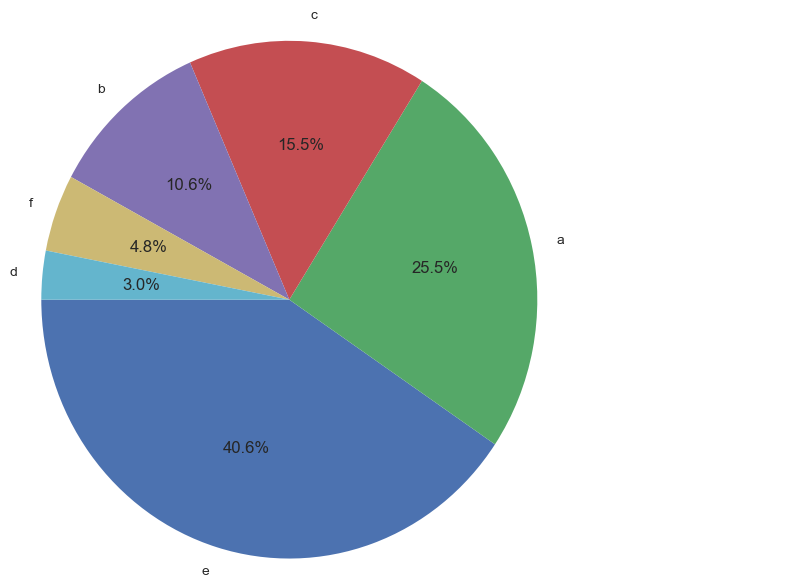

In [206]:
labels = df_train['5'].value_counts().index.tolist()
counts = df_train['5'].value_counts().values.tolist()
fig1, ax1 = plt.subplots()
ax1.pie(counts, labels=labels, autopct='%1.1f%%', startangle=180)
ax1.axis([0, 2, -1, 0.4])
plt.show()

**Let's see how it correlates with our labels**

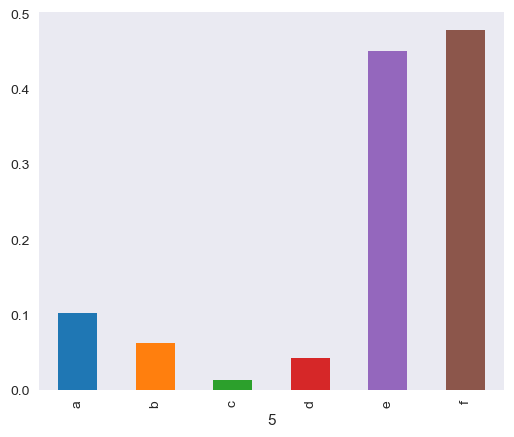

In [207]:
rpt = (df_train.groupby(df_train['5']).label.mean()).dropna()
rpt.plot.bar(figsize=(6, 5))

e and f are close to a random label while the rest have a mean less than 0.1

**Feature '6'**

In [208]:
df_train['6'].describe()

count     24353
unique        5
top           A
freq      20795
Name: 6, dtype: object

**Frequency of each category**

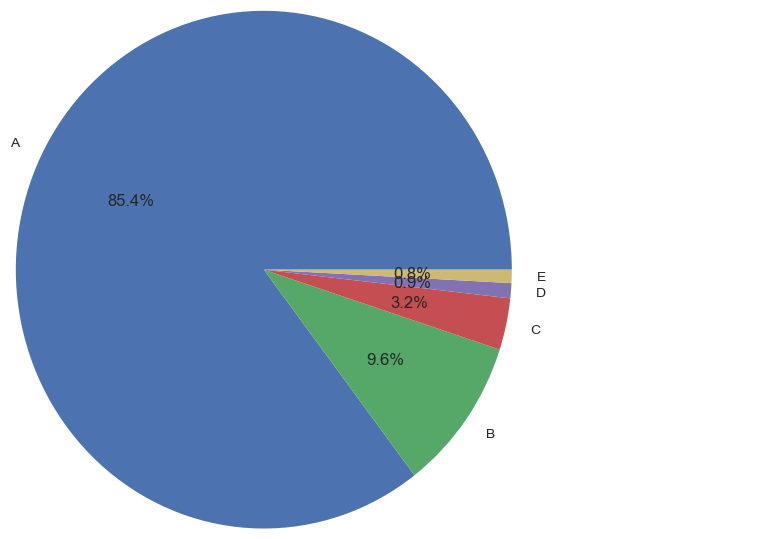

In [209]:
labels = df_train['6'].value_counts().index.tolist()
counts = df_train['6'].value_counts().values.tolist()
fig1, ax1 = plt.subplots()
ax1.pie(counts, labels=labels, autopct='%1.1f%%')
ax1.axis([0, 2, -1, 0.4])
plt.show()

Over 85% are A

**Let's see how it correlates with our labels**

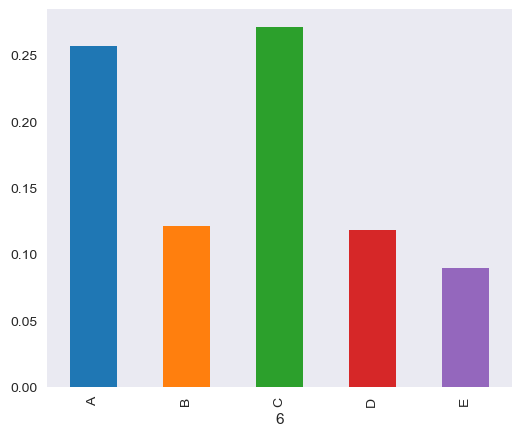

In [210]:
rpt = (df_train.groupby(df_train['6']).label.mean()).dropna()
rpt.plot.bar(figsize=(6, 5))

**Feature '8'**

In [211]:
df_train['8'].describe()

count     24417
unique       42
top          c0
freq      21850
Name: 8, dtype: object

**Frequency of each category**

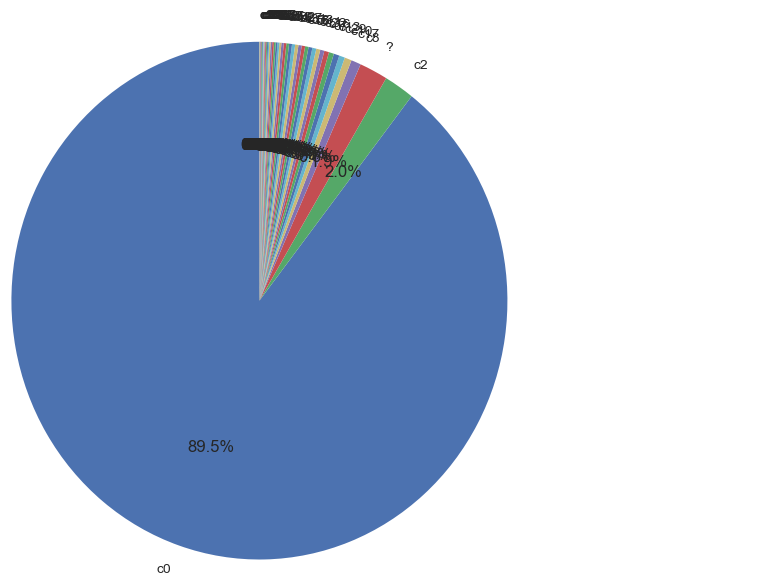

In [212]:
labels = df_train['8'].value_counts().index.tolist()
counts = df_train['8'].value_counts().values.tolist()
fig1, ax1 = plt.subplots()
ax1.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90) 
ax1.axis([0, 2, -1, 0.4])
plt.show()

There are 42 categories for feature 8. c0 is the most common of them with 89.5%. Some of the samples are labeled ?, we shall handle that later

**Let's see how it correlates with our labels**

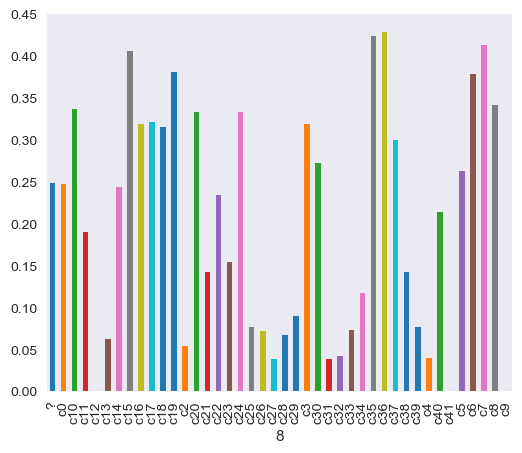

In [213]:
rpt = (df_train.groupby(df_train['8']).label.mean()).dropna()
rpt.plot.bar(figsize=(6, 5))

No visible correlation

## Let us analyze again the missing data from all the features:

questions we want to ask:
* How prevalent is the missing data?
* Is missing data random or does it have a pattern?

In [214]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
0,1413,0.057862
19,104,0.004259
5,102,0.004177
20,98,0.004013
13,94,0.003849
1,89,0.003645
7,82,0.003358
14,76,0.003112
12,72,0.002948
18,71,0.002907


### Short summery:
* Feature 1 (bool) 1 doesn't look like any familiar distribution and is in correlation with the labels
* Feature 8 (categorial) has 43 different categories
* Feature 9 (numerical) resembles the gamma distribution, it's label probability is bell shaped with a mean=4.7
* Feature 10 (numerical) looks like a gaussian distribution (mean=26.197, std=20.04), it's label probability looks uniformly distributed
* Feature 11 (numerical) looks like a gaussian distribution (mean=6.37, std=1.23), it's label probability is bell shaped with a mean=7.9
* Feature 12 (numerical) looks like gamma distribution
* Feature 13  (numerical) doesn't look like any familiar distribution,  it is correlated with the labels probability
* Feature 14  (numerical) looks a lot like a shifted version of feature 13, it is correlated with the labels probability
* Feature 15 (numerical) looks like a gaussian distribution (mean=2.7, std=1.26),  it is correlated with the labels probability
* Feature 16 (numerical) llike gamma distribution
* Feature 17 (numerical) is highly biased - the majority of the samples are 0, there is a correlation between the feature and the labels probability
* Feature 18 (numerical) is highly biased - the majority of the samples are 0
* Feature 19 (numerical) most of the samples are centered around the value 80.0
* Feature 20 (numerical) looks like a gaussian distribution (mean=4.07, std=1.68)

No significant insight from other features

We saw each feature's distribution and correlation with the labels.

## Collinear features

We'll use the `FeatureSelector` tool to look for collinear features. Collinear features are features that are highly correlated with one another. In machine learning, these lead to decreased generalization performance on the test set due to high variance and less model interpretability. The tool will find  collinear features based on the correlation coefficient between features. For each pair of features with a correlation coefficient greather than `correlation_threshold`, only one of the pair is recommended for removal. correlations are only calculated between numeric columns.

In [215]:
fs_analyze = FeatureSelector(data = df_train.drop(columns = ['label']), labels = df_train['label'])
fs_analyze.identify_collinear(correlation_threshold=0.8)

3 features with a correlation magnitude greater than 0.80.



In [216]:
fs_analyze.record_collinear

,drop_feature,corr_feature,corr_value
0,11,9,0.882835
1,13,1,0.874289
2,14,1,0.921297
3,14,13,0.921564


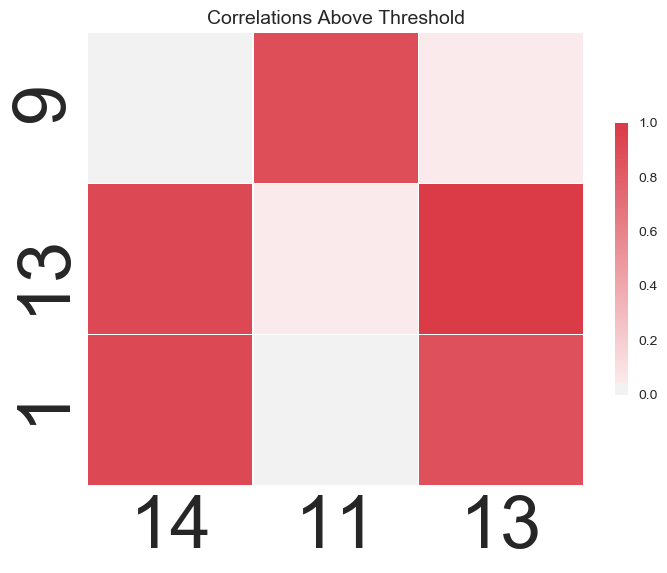

In [217]:
# correlations heatmap
fs_analyze.plot_collinear()

We can see high correlation between the pairs (9,11), (1,14), (1,13), (14,13). Moreover the FeatureSelector tool is recommending to remove features 11,13,14

We can use a **one hot encoding** for the categorial features and see the correlations including them:

In [218]:
fs_analyze.identify_collinear(correlation_threshold=0.8, one_hot=True)
fs_analyze.record_collinear

5 features with a correlation magnitude greater than 0.80.



,drop_feature,corr_feature,corr_value
0,11,9,0.882835
1,13,1,0.874289
2,14,1,0.921297
3,14,13,0.921564
4,2_E,4,0.984131
5,5_e,4,0.902725
6,5_e,2_E,0.889468


We can see there's a high correlation between (4,2_E), (4, 5_e) and (2_E, 5_e). The FeatureSelector tool is recommending to remove features 2_E, 5_e

Let's see the correlation matrix between all the numerical and boolean features:

3 features with a correlation magnitude greater than 0.80.



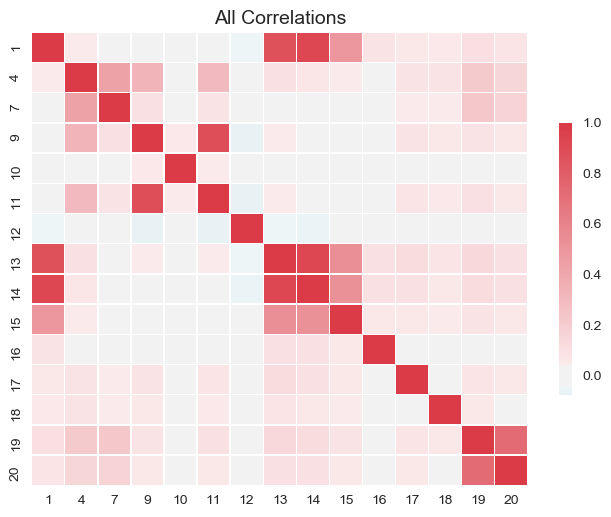

In [219]:
fs_analyze.identify_collinear(correlation_threshold=0.8)
fs_analyze.plot_collinear(plot_all=True)

This heatmap is the best way to get a quick overview of our the relationships between the features

### We shall now investigate correlations with the label:

The 5 features with the highest correlation coeff with the label are:

In [220]:
k = 6 #number of variables for heatmap
corrmat = df_train.corr()
cols = corrmat.nlargest(k, 'label')['label'].index
cols

Index(['label', '4', '13', '14', '1', '9'], dtype='object')

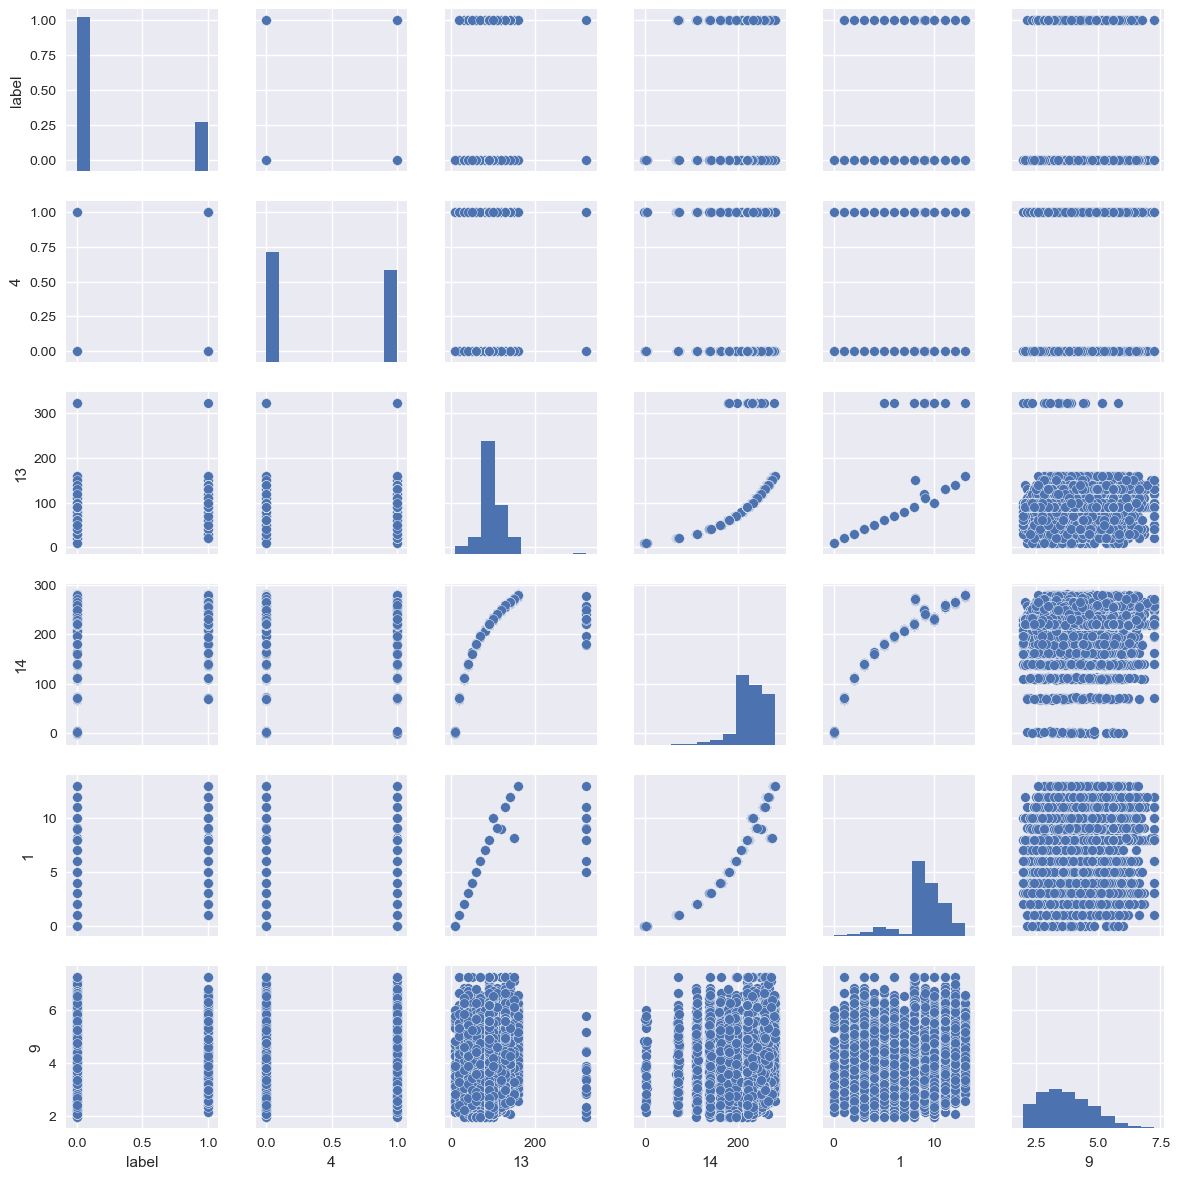

In [221]:
sns.set()
sns.pairplot(df_train[cols].dropna(), size=2.0)
plt.show()

Although we already know some of the main figures, this mega scatter plot gives us a reasonable idea about variables relationships.

We can see again "linear" relationship between some of the features like 1 and 13

## Zero important features

the `FeatureSelector` tool lets us use the `identify_zero_importance` function which finds features that have zero importance according to a gradient boosting machine (GBM) learning model. This helps us find the most relevant features for a task. We can also use feature importances for feature selection by removing zero importance features.
The `FeatureSelector` finds feature importances using the gradient boosting machine from the LightGBM library - https://lightgbm.readthedocs.io/en/latest/. The feature importances are averaged over 10 training runs of the GBM in order to reduce variance. Also, the model is trained using early stopping with a validation set to prevent overfitting to the training data.

In [222]:
fs_analyze.identify_zero_importance(task = 'classification', eval_metric = 'auc', n_iterations = 10, early_stopping = True)
zero_importance_features = fs_analyze.ops['zero_importance']

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[165]	valid_0's binary_logloss: 0.301257	valid_0's auc: 0.91699
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[123]	valid_0's binary_logloss: 0.282299	valid_0's auc: 0.92663
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[153]	valid_0's binary_logloss: 0.288791	valid_0's auc: 0.925192
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[200]	valid_0's binary_logloss: 0.285456	valid_0's auc: 0.924104
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[170]	valid_0's binary_logloss: 0.274455	valid_0's auc: 0.931391
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[201]	valid_0's binary_logloss: 0.306994	valid_0's auc:

This gives us two plots:

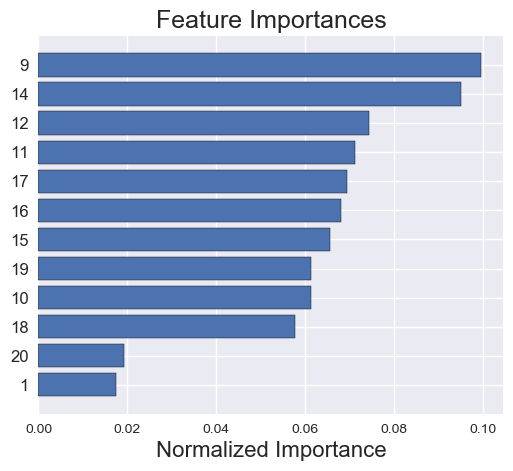

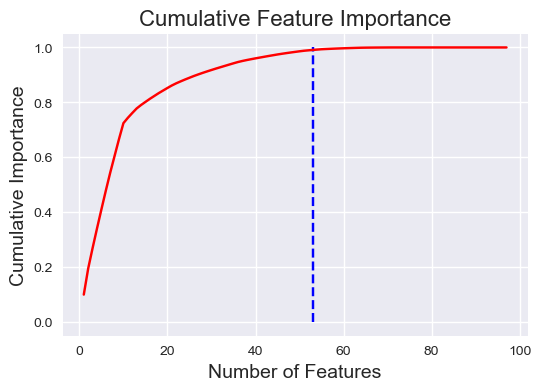

53 features required for 0.99 of cumulative importance


In [223]:
fs_analyze.plot_feature_importances(threshold = 0.99, plot_n = 12)

In the top one we have the `plot_n` most important features (plotted in terms of normalized importance where the total sums to 1). On the lower one we have the cumulative importance versus the number of features. The vertical line is drawn at threshold of the cumulative importance, in this case 99%.

## Low important features

The next method builds on zero importance function, using the feature importances from the model for further selection. The function identify_low_importance finds the lowest importance features that do not contribute to a specified total importance.

In [224]:
fs_analyze.identify_low_importance(cumulative_importance = 0.99)

52 features required for cumulative importance of 0.99 after one hot encoding.
45 features do not contribute to cumulative importance of 0.99.



Based on the plot of cumulative importance and this information, the gradient boosting machine considers many of the features to be irrelevant for learning.

The low_importance method borrows from one of the methods of using **Principal Components Analysis (PCA)** where it is common to keep only the PC needed to retain a certain percentage of the variance (such as 95%). The percentage of total importance accounted for is based on the same idea.

## 2. Data Preproecing

In order to make the code more modular for this section and for the next one, we chose to implement it in a .py file called DataPreprocessing.py. In this module we implemented a class `PreprocessingPipeline` in charge of loading and processing the data. the actions that will be performed and their order:
1. `handle_missing_data()` - mean value for numerical and most commot value for categorical features
2. `handle_unknown_features()` - np.Nan for samples 'unknown' or '?'
3. `remove_outliers_from_train()` - remove outliers based on Z-score of each value in the column, relative to the column mean and standard deviation. This is done prior to label encoding. Thats because when we tried otherwise we noticed that more than 2/3 of the data was thrown away.
4. `encode_categorical()` - one hot encoding
5. `feature_scaling()` - standatization

After completing the above stages we will use the `FeatureSelector` tool to identify which features to remove. 
The methods we will use are:
* `identify_collinear()` - based on correlation coefficients between features 
* `identify_zero_importance()` - based on a gradient boosting machine (GBM) learning model
* `identify_low_importance()` - based on principal Components Analysis (PCA)

Except from outliers removal, we will perform the same operation on the test set

In [225]:
from DataPreprocessing import *
data_pipeline = DataPreprocessing(train='train.csv', test='test_without_target.csv')
data_pipeline.handle_missing_data()
data_pipeline.handle_missing_data(test=True)
data_pipeline.handle_unknown_features()
data_pipeline.handle_unknown_features(test=True)
data_pipeline.remove_outliers_from_train()
data_pipeline.encode_categorical()
data_pipeline.encode_categorical(test=True)
data_pipeline.feature_scaling()
data_pipeline.feature_scaling(test=True)

In [226]:
data_pipeline._df_train.head()

,0_A,0_B,0_C,0_D,0_E,0_F,0_G,6_A,6_B,6_C,...,12,13,14,15,16,17,18,19,20,label
1,0.567243,-0.208139,-0.175806,-0.284273,-0.180749,-0.263808,-0.021449,0.413316,-0.327624,-0.179797,...,-0.568822,1.212782,1.064356,0.440166,0.083552,-0.245869,-0.036769,-0.007031,-0.674822,0
2,-1.762912,-0.208139,-0.175806,3.517746,-0.180749,-0.263808,-0.021449,0.413316,-0.327624,-0.179797,...,-0.035597,-0.060071,0.060902,0.543716,2.427625,-0.245869,-0.036769,0.900934,1.329278,0
3,-1.762912,-0.208139,5.688084,-0.284273,-0.180749,-0.263808,-0.021449,0.413316,-0.327624,-0.179797,...,0.709714,1.212782,1.060482,0.349572,0.154802,-0.245869,-0.036769,1.354917,0.661245,1
4,0.567243,-0.208139,-0.175806,-0.284273,-0.180749,-0.263808,-0.021449,0.413316,-0.327624,-0.179797,...,-0.414479,-0.060071,-0.007680,-0.470829,-0.443828,-0.245869,-0.036769,-0.007031,-0.006789,0
5,-1.762912,-0.208139,5.688084,-0.284273,-0.180749,-0.263808,-0.021449,0.413316,-0.327624,-0.179797,...,-0.311289,-0.060071,0.023133,-1.789859,1.954003,-0.245869,-0.036769,-0.007031,0.661245,1


In [227]:
data_pipeline._df_test.head()

,0_A,0_B,0_C,0_D,0_E,0_F,0_G,6_A,6_B,6_C,...,11,12,13,14,15,16,17,18,19,20
0,0.567243,-0.208139,-0.175806,-0.284273,-0.180749,-0.263808,-0.021449,0.413316,-0.327624,-0.179797,...,-0.364865,1.018731,-0.060071,0.213406,-0.482951,1.847053,-0.245869,-0.036769,-0.007031,-0.006789
1,0.567243,-0.208139,-0.175806,-0.284273,-0.180749,-0.263808,-0.021449,0.413316,-0.327624,-0.179797,...,-1.452968,2.712785,-0.060071,0.122505,-1.556644,-0.427731,-0.245869,-0.036769,-2.276944,-1.342855
2,0.567243,-0.208139,-0.175806,-0.284273,-0.180749,-0.263808,-0.021449,0.413316,-0.327624,-0.179797,...,-0.909658,0.211048,-0.060071,0.097830,-0.798226,-0.894773,-0.245869,-0.036769,-0.007031,0.661245
3,0.567243,-0.208139,-0.175806,-0.284273,-0.180749,-0.263808,-0.021449,0.413316,-0.327624,-0.179797,...,-0.096644,-0.818650,-1.332925,-1.396072,-1.527878,-0.098019,-0.245869,-0.036769,0.446952,2.665344
4,0.567243,-0.208139,-0.175806,-0.284273,-0.180749,-0.263808,-0.021449,0.413316,-0.327624,-0.179797,...,-1.701328,-1.391694,-0.060071,0.068432,-0.520838,-0.324101,-0.245869,-0.036769,-0.914996,-0.006789


In [228]:
fs = FeatureSelector(data = data_pipeline._df_train.drop(columns = ['label']), labels = data_pipeline._df_train['label'])

In [229]:
fs.identify_collinear(correlation_threshold=0.8)
fs.identify_zero_importance(task = 'classification', eval_metric = 'auc', n_iterations = 10, early_stopping = True)
fs.identify_low_importance(cumulative_importance = 0.99)

5 features with a correlation magnitude greater than 0.80.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[97]	valid_0's binary_logloss: 0.29517	valid_0's auc: 0.914789
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[163]	valid_0's binary_logloss: 0.286484	valid_0's auc: 0.920579
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[136]	valid_0's binary_logloss: 0.31122	valid_0's auc: 0.903131
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[234]	valid_0's binary_logloss: 0.311782	valid_0's auc: 0.904942
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[249]	valid_0's binary_logloss: 0.28531	valid_0's auc: 0.916184
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration i

## Removing the redundant features 

**It is important to mention that the feature selection we did will be evaluated with cross validation to see if it has a beneficial effect.** We will check the performance of the learning models on the low dimension data set and on the full dimension data set and compare the results 

In [230]:
features_to_remove = list(set([x[i] for x in fs.ops.values() for i in range(len(x))]))
low_dim_processed_train = data_pipeline._df_train.drop(features_to_remove, axis=1)
low_dim_processed_test = data_pipeline._df_test.drop(features_to_remove, axis=1)

## Resampling 

**As we saw in the first part, the data is highly imbalanced (more 0's than 1's). To solve this problem we will use a resampling method called under-sampling**

In [231]:
# Class count
count_class_0, count_class_1 = low_dim_processed_train.label.value_counts()

# Divide by class
df_class_0 = low_dim_processed_train[low_dim_processed_train['label'] == 0]
df_class_1 = low_dim_processed_train[low_dim_processed_train['label'] == 1]

In [232]:
df_class_0_under = df_class_0.sample(count_class_1)
df_train_under = pd.concat([df_class_0_under, df_class_1], axis=0)

Now the dataset is more balanced:

Random under-sampling:
1    4890
0    4890
Name: label, dtype: int64


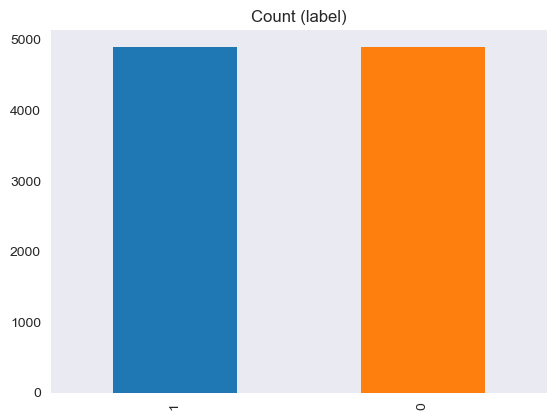

In [233]:
print('Random under-sampling:')
print(df_train_under.label.value_counts())

df_train_under.label.value_counts().plot(kind='bar', title='Count (label)');

## 3. Running models

To find the optimal hyper-parameters we will run a grid search for each model

After running a grid search for each model and finding the optimal hyper-parameters we will create models with the best parameters and comment out the grid search code to save run time for next runs

In [234]:
from LearningModels import *
from sklearn.model_selection import GridSearchCV
RU_low_dim = RunUtils(dataset=df_train_under)
X_train, y_train, X_validation, y_validation = RU_low_dim.X_train, RU_low_dim.y_train, RU_low_dim.X_validation, RU_low_dim.y_validation

**Naïve Bayes Classifier**

There are no hyper-parameters to tune in this models

**Logistic Regression**

**Logistic Regression is best (recieved best AUC): 0.897599 using {'C': 1.0, 'penalty': 'l1'}**

Our logistic regression model will be:

**Support Vector Machine**

**Artificial neural network** 

We'll start with a basic model and grid search for the optimal hyper-parameters. If we try to search for all parameters the amount of combinations will be huge and it will take forever to grid seach. Hence we will chose to start with:
* `Adam` optimizer https://arxiv.org/abs/1412.6980. Adam is a method for stochastic optimization which usually yields very good results when optimizing a deep neural network.
* `Glorot Uniform` http://jmlr.org/proceedings/papers/v9/glorot10a/glorot10a.pdf weights initializer, also called Xavier uniform initializer. It draws samples from a uniform distribution within [-limit, limit] where limit is sqrt(6 / (fan_in + fan_out)) where fan_in is the number of input units in the weight tensor and fan_out is the number of output units in the weight tensor. This helps to prevent the variance of the weights initialized from becoming very small.
* `Relu` https://en.wikipedia.org/wiki/Rectifier_(neural_networks) activation function because it usually works best.

In [235]:
from keras.wrappers.scikit_learn import KerasClassifier

**ANN is best (recieved best AUC): 0.902591 using {'batch_size': 50, 'dropout_rate': 0.3, 'epochs': 50, 'layers': (50, 50, 50, 50, 50)}**

**ANN is best (recieved best AUC): 0.903402 using {'layers': (50, 50, 50), 'optimizer': 'Adamax'}**

**ANN is best (recieved best AUC): 0.905988 using {'activation': 'softplus', 'dropout_rate': 0.12222222222222223}
**

**Our final ann model will be:**

In [236]:
def ANN_final(layers=(50, 50, 50), input_dim=X_train.shape[1], weights_init='glorot_uniform', activation='softplus', dropout_rate=0.12222, optimizer='Adamax'):   
    # Init the ANN
    classifier = Sequential()
    # Adding the input layer and the first hidden layer
    classifier.add(Dense(input_dim=input_dim, units=layers[0], kernel_initializer=weights_init, activation=activation))
    # Adding the hidden layers
    for neurons in layers[1:]:
        classifier.add(Dropout(dropout_rate))
        classifier.add(Dense(units=neurons, kernel_initializer=weights_init, activation=activation))
    # Adding the output layer
    classifier.add(Dense(units=1, kernel_initializer=weights_init, activation='sigmoid'))
    # Compiling the ANN
    classifier.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    return classifier

**Lets see how our ANN3 works with the unfiltered high dimension data**

Similar result. This could mean that the feature selection was good and we didn't lose valueable data

## 4. Model evaluation

In this part we will assess each classifier's performance 

In [237]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold
from scipy import interp
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import neighbors
from sklearn.naive_bayes import GaussianNB

In [238]:
def KfoldPlot(X, y, clf, k):
    cv = KFold(n_splits=k,shuffle=False)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0,1,100)
    i = 1
    fig = plt.figure(figsize=[6,6])
    for train,test in cv.split(X,y):
        prediction = clf.predict_proba(X[test])
        if prediction.shape[1] == 2:
            prediction = prediction[:, 1]            
        fpr, tpr, t = roc_curve(y[test], prediction)
        tprs.append(interp(mean_fpr, fpr, tpr))
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=2, color='gray', alpha=0.3, label='K-Folds')
        i+=1
        
    plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
    mean_tpr = np.mean(tprs, axis=0)
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, color='red', label='Mean ROC (area = %0.2f )' % (mean_auc),lw=2, alpha=1)
    
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), loc="lower right")
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC of {}'.format(clf.__class__.__name__))
    plt.show()

**Naïve Bayes Classifier**

In [239]:
from sklearn.naive_bayes import GaussianNB
NB_clf = GaussianNB().fit(X_train, y_train)
NB_y_pred = NB_clf.predict(X_validation)

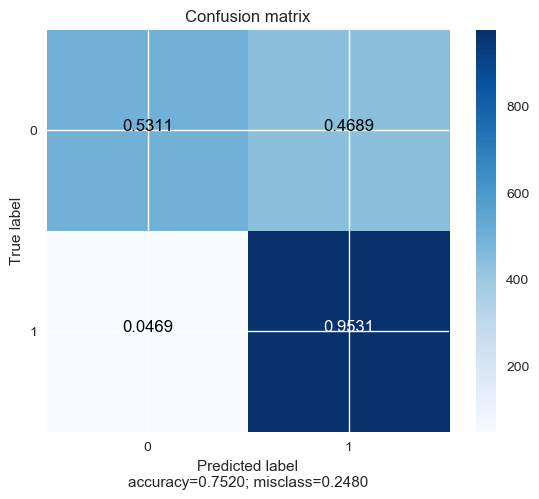

In [240]:
RU_low_dim.create_confusion_matrix(y_validation, NB_y_pred)
RU_low_dim.plot_confusion_matrix()

Very poor accuracy

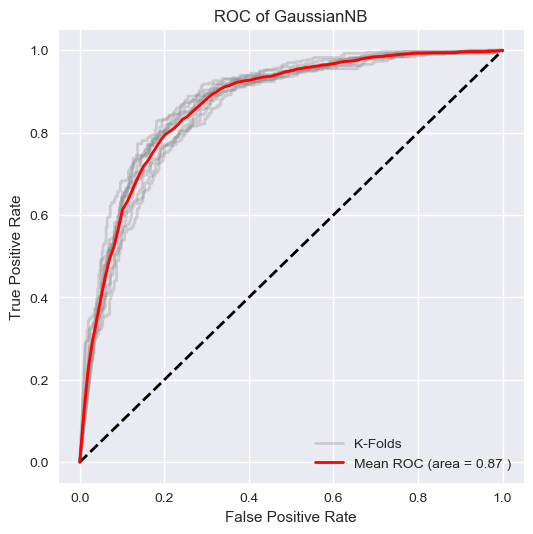

In [241]:
KfoldPlot(X_train, y_train, NB_clf, 10)

THe Naive Bayes classifier does not give us good results

**Logistic Regression**

In [242]:
from sklearn.linear_model import LogisticRegression

In [243]:
# using the params we found in the grid search
LR_clf = LogisticRegression(C=1.0, penalty='l1')
LR_clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [244]:
LR_y_pred = LR_clf.predict(X_validation)

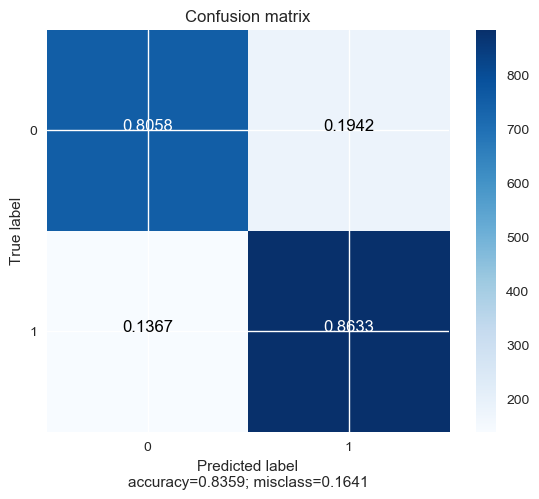

In [245]:
RU_low_dim.create_confusion_matrix(y_validation, LR_y_pred)
RU_low_dim.plot_confusion_matrix()

Much better results. Let's see the ROC graph:

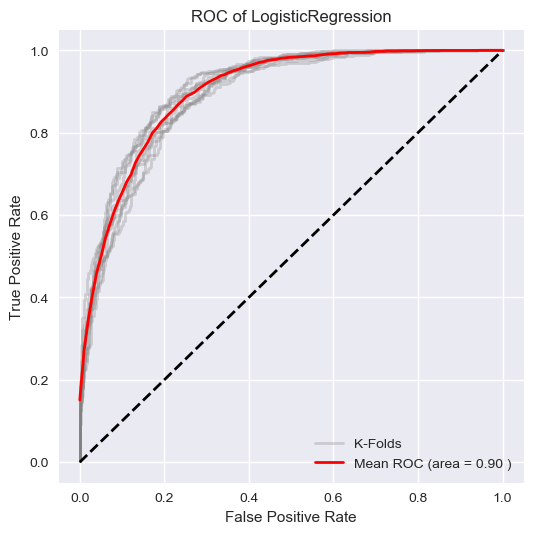

In [246]:
KfoldPlot(X_train, y_train, LR_clf, 10)

**SVM**

In [247]:
from sklearn.svm import SVC

In [248]:
# using the params we found in the grid search
SVM_clf = SVC(C=0.1, gamma=1.0, kernel='linear',probability=True)
SVM_clf.fit(X_train, y_train)
SVM_clf.predict(X_validation)

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [249]:
SVM_y_pred = SVM_clf.predict(X_validation)

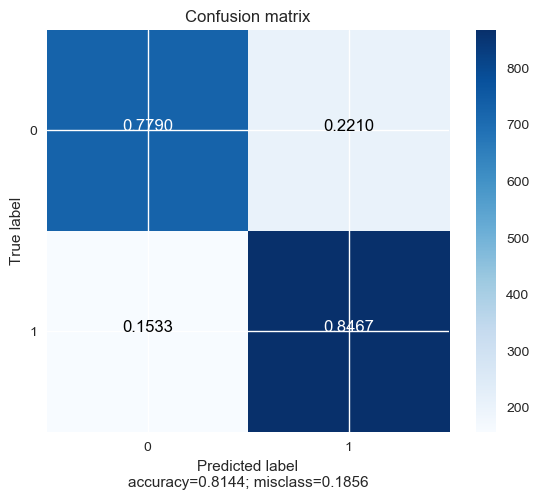

In [250]:
RU_low_dim.create_confusion_matrix(y_validation, SVM_y_pred)
RU_low_dim.plot_confusion_matrix()

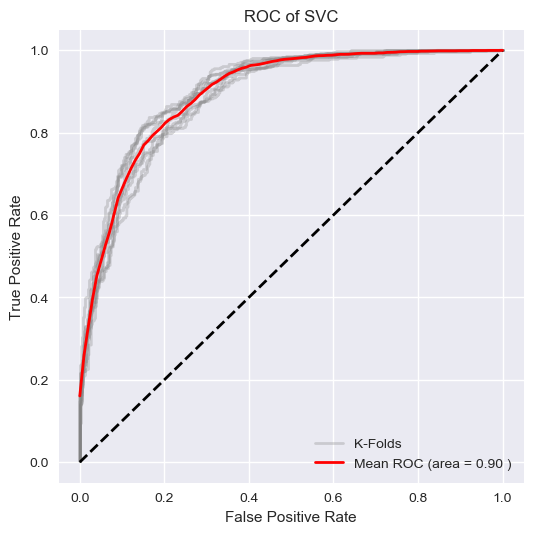

In [251]:
KfoldPlot(X_train, y_train, SVM_clf, 10)

Similar results to the Logistic Regression classifier

**ANN**

In [252]:
# using our best ANN model
ANN_clf = ANN_final()
history = ANN_clf.fit(X_train, y_train, epochs=50, batch_size=50, 
                      validation_data=(X_validation, y_validation), verbose=0)

In [253]:
ANN_y_pred = ANN_clf.predict(X_validation)
# transform probabilities into booleans
ANN_y_pred = ANN_y_pred > 0.5

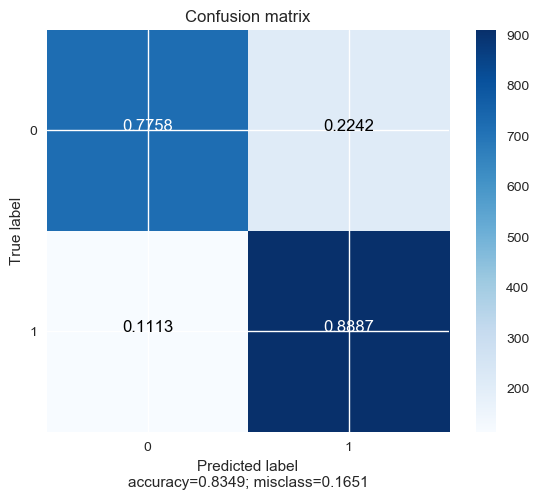

In [254]:
RU_low_dim.create_confusion_matrix(y_validation, ANN_y_pred)
RU_low_dim.plot_confusion_matrix()

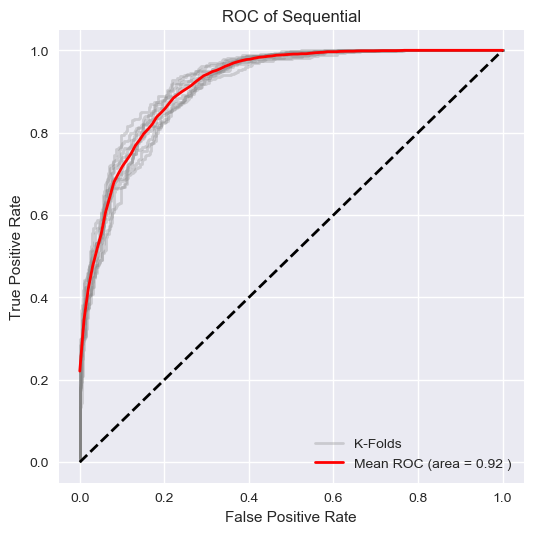

In [255]:
KfoldPlot(X_train, y_train, ANN_clf, 10)

**This model has the best results (ROC area=0.92)**

Let's look the the accuracy and loss of the ANN as function of epochs:

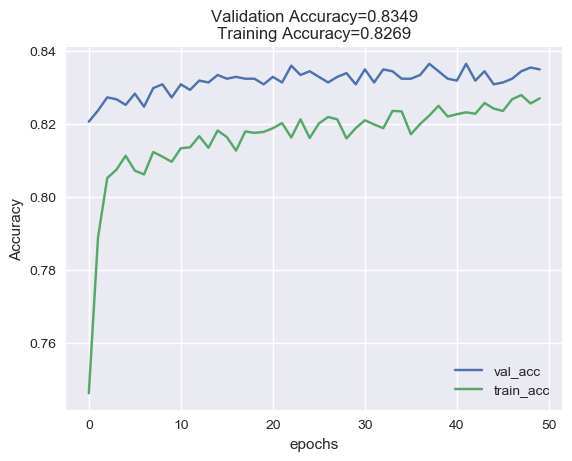

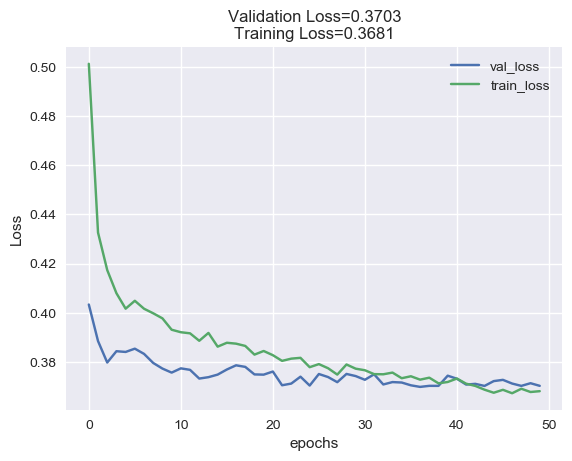

In [256]:
RU_low_dim.view_graphs(history)

These graphs show us that the accuracy and the loss the the training set and the validation set are very close. **This means there is almost no overfitting of the data**. This was done using the famous dropout method (http://jmlr.org/papers/v15/srivastava14a.html) and an ealy stop of the training (number of epochs)

Lastly we will predict the test.csv samples:

In [257]:
test_predictions = pd.DataFrame(ANN_clf.predict(low_dim_processed_test))
test_predictions = (test_predictions > 0.5)*1
test_predictions.columns = ['label']

In [258]:
test_predictions.to_csv('02.csv')